In [5]:
import sys
!{sys.executable} -m pip install yfinance --upgrade --no-cache-dir 
!{sys.executable} -m pip install pandas==1.3.5
# !pip install lxml
# !pip install -i https://pypi.anaconda.org/ranaroussi/simple yfinance #on anaconda

In [6]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
msft = yf.Ticker("MSFT")
df = msft.history(start="2013-01-01", end="2023-01-01",interval="1d")

In [8]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2013-01-02 00:00:00-05:00,22.469591,22.865385,22.387133,22.774683,52899300,0.0,0.0
2013-01-03 00:00:00-05:00,22.782934,22.799425,22.395385,22.469597,48294400,0.0,0.0
2013-01-04 00:00:00-05:00,22.486085,22.543804,22.040815,22.049061,52521100,0.0,0.0
2013-01-07 00:00:00-05:00,22.073795,22.164497,21.966600,22.007830,37110400,0.0,0.0
2013-01-08 00:00:00-05:00,22.057306,22.090290,21.818180,21.892391,44703100,0.0,0.0
...,...,...,...,...,...,...,...
2022-12-23 00:00:00-05:00,236.110001,238.869995,233.940002,238.729996,21207000,0.0,0.0
2022-12-27 00:00:00-05:00,238.699997,238.929993,235.830002,236.960007,16688600,0.0,0.0
2022-12-28 00:00:00-05:00,236.889999,239.720001,234.169998,234.529999,17457100,0.0,0.0


In [9]:
df['30_SMA'] = df['Close'].rolling(30).mean()
df['60_SMA'] = df['Close'].rolling(60).mean()
df['90_SMA'] = df['Close'].rolling(90).mean()

In [10]:
df['30_SMA']

Date
2013-01-02 00:00:00-05:00           NaN
2013-01-03 00:00:00-05:00           NaN
2013-01-04 00:00:00-05:00           NaN
2013-01-07 00:00:00-05:00           NaN
2013-01-08 00:00:00-05:00           NaN
                                ...    
2022-12-23 00:00:00-05:00    245.958558
2022-12-27 00:00:00-05:00    245.643373
2022-12-28 00:00:00-05:00    245.432000
2022-12-29 00:00:00-05:00    245.422666
2022-12-30 00:00:00-05:00    245.359000
Name: 30_SMA, Length: 2518, dtype: float64

In [11]:
df['60_SMA']

Date
2013-01-02 00:00:00-05:00           NaN
2013-01-03 00:00:00-05:00           NaN
2013-01-04 00:00:00-05:00           NaN
2013-01-07 00:00:00-05:00           NaN
2013-01-08 00:00:00-05:00           NaN
                                ...    
2022-12-23 00:00:00-05:00    239.631534
2022-12-27 00:00:00-05:00    239.710109
2022-12-28 00:00:00-05:00    239.617885
2022-12-29 00:00:00-05:00    239.498375
2022-12-30 00:00:00-05:00    239.353714
Name: 60_SMA, Length: 2518, dtype: float64

In [12]:
df['90_SMA']

Date
2013-01-02 00:00:00-05:00           NaN
2013-01-03 00:00:00-05:00           NaN
2013-01-04 00:00:00-05:00           NaN
2013-01-07 00:00:00-05:00           NaN
2013-01-08 00:00:00-05:00           NaN
                                ...    
2022-12-23 00:00:00-05:00    245.201553
2022-12-27 00:00:00-05:00    244.619391
2022-12-28 00:00:00-05:00    244.054770
2022-12-29 00:00:00-05:00    243.655221
2022-12-30 00:00:00-05:00    243.256964
Name: 90_SMA, Length: 2518, dtype: float64

In [13]:
df['Daily_Range'] = (df['High'] - df['Low']) / df['Open'] * 100

In [14]:
df['Daily_Range']

Date
2013-01-02 00:00:00-05:00    2.128440
2013-01-03 00:00:00-05:00    1.773434
2013-01-04 00:00:00-05:00    2.236893
2013-01-07 00:00:00-05:00    0.896525
2013-01-08 00:00:00-05:00    1.233652
                               ...   
2022-12-23 00:00:00-05:00    2.088007
2022-12-27 00:00:00-05:00    1.298697
2022-12-28 00:00:00-05:00    2.342861
2022-12-29 00:00:00-05:00    2.660728
2022-12-30 00:00:00-05:00    1.385334
Name: Daily_Range, Length: 2518, dtype: float64

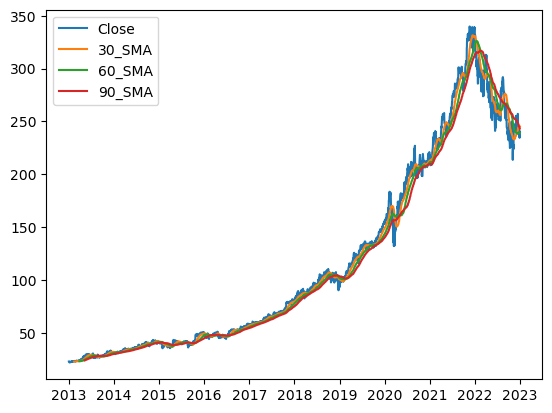

In [15]:
plt.plot(df['Close'], label='Close')
plt.plot(df['30_SMA'], label='30_SMA')
plt.plot(df['60_SMA'], label='60_SMA')
plt.plot(df['90_SMA'], label='90_SMA')
plt.legend()
plt.show()

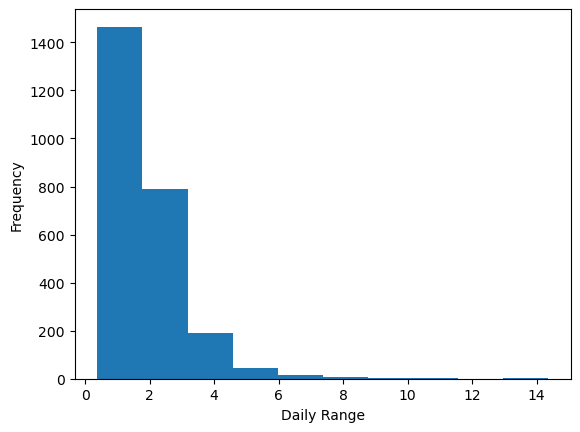

In [16]:
plt.hist(df['Daily_Range'])
plt.xlabel('Daily Range')
plt.ylabel('Frequency')
plt.show()

There are several options that can be used to model future prices. Linear regression, SVMs (support vector machines), decision trees are all possible methods. I am using lightgbm as it uses a leaf-wise approach compared to other algorithms where they do a level-wise approach resulting in higher accuracy. Lightgbm is commonly used as a fast gradient boosting framework.

In [17]:
!conda install lightgbm

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 22.11.1

Please update conda by running

    $ conda update -n base conda



# All requested packages already installed.



In [27]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [24]:
X = df.drop(columns=['Close'])
y = df['Close']

In [ ]:
# Splitting data into training, validation, and test sets

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
# Performing feature engineering and scaling

In [26]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [ ]:
# Tuning the hyperparameters using  the GridSearchCV function

In [28]:
# Defining grid of hyperparameter values to search over
param_grid = {
    'learning_rate': [0.01, 0.1, 1],
    'num_leaves': [30, 50, 70],
    'n_estimators': [100, 200, 300]
}

In [31]:
gbm = lgb.LGBMRegressor()
grid_search = GridSearchCV(gbm, param_grid, cv=3)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=LGBMRegressor(),
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'n_estimators': [100, 200, 300],
                         'num_leaves': [30, 50, 70]})

In [36]:
print(grid_search.best_params_)

{'learning_rate': 0.1, 'n_estimators': 100, 'num_leaves': 50}


In [37]:
# Create LightGBM model
model = lgb.LGBMRegressor(learning_rate=grid_search.best_params_['learning_rate'],
                          num_leaves=grid_search.best_params_['num_leaves'],
                          n_estimators=grid_search.best_params_['n_estimators'])

In [38]:
# Fit model to training data
model.fit(X_train, y_train)

LGBMRegressor(num_leaves=50)

In [60]:
# Make predictions on test set
predictions = model.predict(X_test)

In [43]:
print('Training accuracy {:.4f}'.format(model.score(X_train,y_train)))
print('Testing accuracy {:.4f}'.format(model.score(X_test,y_test)))

Training accuracy 0.9999
Testing accuracy 0.9997


In [56]:
# Evaluating model's peformance using a common metric, mean squared error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')

Mean Absolute Error: 0.93
Mean Squared Error: 2.71


In [54]:
dfr=pd.DataFrame({'Actual_Price':y_test, 'Predicted_Price':predictions})
dfr.head(10)

,Actual_Price,Predicted_Price
Date,,
2021-09-22 00:00:00-04:00,295.268036,294.290206
2014-08-19 00:00:00-04:00,39.315380,39.165005
2018-07-10 00:00:00-04:00,97.038460,97.377315
2016-07-13 00:00:00-04:00,48.656567,48.658520
2020-01-16 00:00:00-05:00,161.547562,160.431850
2013-03-25 00:00:00-04:00,23.412197,23.377745
2013-03-07 00:00:00-05:00,23.395571,23.449567
2017-05-24 00:00:00-04:00,64.096626,63.973260
2014-06-19 00:00:00-04:00,35.778759,36.089113


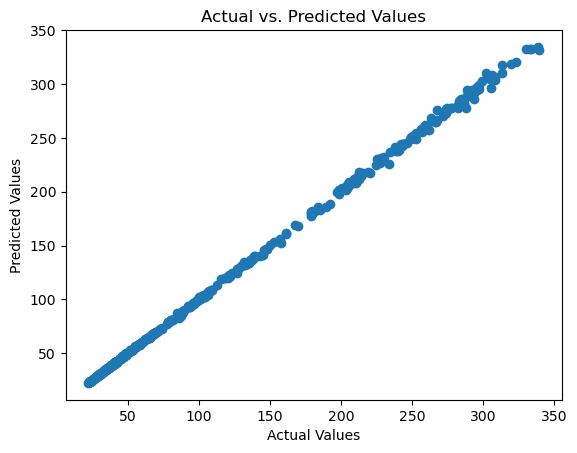

In [42]:
# Plot actual vs. predicted values
plt.scatter(y_test, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

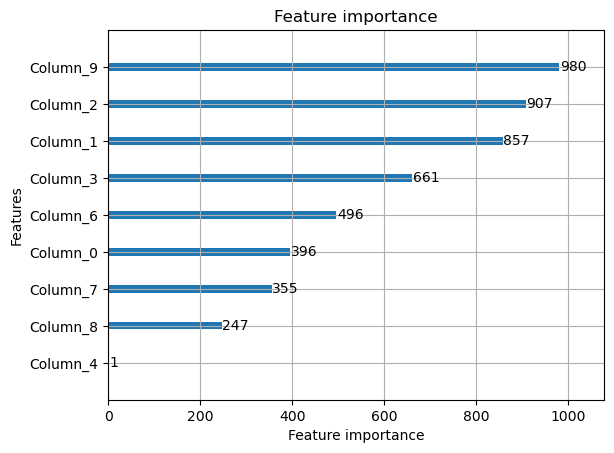

In [44]:
lgb.plot_importance(model)

In [69]:
x2 = y_test.mean()
y2 = predictions.mean()
Accuracy = x2/y2 * 100
print("The accuracy of the model is " , Accuracy)

The accuracy of the model is  99.97406988557938


Use the historic data to predict future price. Discuss your methodology and findings.
How accurate is the model?
Note that for the last bullet we do not expect a model that is highly accurate. We simply want
to see your thought process for cleaning &amp; prepping data, model selection, and interpreting the
results.

It is generally challenging to predict the future price of a single stock with a high degree of accuracy, even using a sophisticated model such as LightGBM. Stock prices are affected by a wide range of factors, including economic conditions, company performance, investor sentiment, and external events, which can be difficult to anticipate or model accurately.

To evaluate the accuracy of a LightGBM model for predicting stock prices, it is important to measure its performance on a test set using appropriate evaluation metrics, such as root mean squared error or mean absolute error. It may also be useful to compare the model's performance to other models or to the performance of a baseline model.

For this assignment, I performed a basic version of Exploratory Data Analysis (EDA), Training, Validation, Test split, Feature Engineering, Feature Scaling, Hyperparameter Tuning, and applying the Model. EDA allowed me to understand some of the patterns and issues that may impact the model. Splitting the data into training, validation, and test sets enabled me to evaluate the model's performance on unseen data and ensure that it would generalize well to new observations.

Feature engineering and feature scaling improved the predictive power of the model and made it more robust. Hyperparameter tuning involved selecting the optimal values to improve the model's performance.

However, the model may have overfitted due to the fact that it was trained on only 10 years of stock data. There are also many other factors that can affect stock prices, so it is possible that other models may have performed as well or better. Incorporating additional information or using more advanced techniques could have provided additional insights and may have improved the predictions made by the model.

To improve the analysis, I could have used more advanced techniques for EDA such as statistical tests or machine learning algorithms to identify patterns and relationships in the data. For the Training, Validation, Test split, I could have considered using stratified sampling or other sampling techniques and cross-validation to get a more robust estimate of the model's performance. For Feature Engineering, I could have used more advanced techniques such as feature selection and dimensionality reduction to identify the most relevant or informative features, and I could have tried creating higher-order interactions or more complex features. For Feature Scaling, there are other methods available for normalizing features. For Hyperparameter Tuning, I could have tried different optimization methods to find the optimal hyperparameters.

A MAE of 0.93 and an MSE of 2.71 indicate that, on average, the model's predictions were off by 0.93 and the squared error was 2.71. These values can be interpreted as the average error or average deviation of the model's predictions from the actual values.

Overall, the results suggest that LightGBM performed well on the short 10-year time span of data. However, it is important to keep in mind the limitations of the model and to consider other factors that may impact the stock price.


